# Sage's EDA

In [1]:
import pandas as pd  # dataset
import seaborn as sns  #visualization (plottings)
import matplotlib.pyplot as plt  #visualization
import numpy as np  # arrays, algebra, dealing with numbers
from sklearn.preprocessing import normalize

In [29]:
music = pd.read_csv('Spotify_Youtube.csv')
music = music.drop(music.columns[0:3], axis='columns')
# considering also dropping key because honestly that's not really telling us much
# music = music[['Loudness', 'Speechiness', 'Acousticness']]
display(music)

Danceability  Energy  Key  Loudness  Speechiness  Acousticness  \
0             0.818   0.705    6    -6.679       0.1770      0.008360   
1             0.676   0.703    8    -5.815       0.0302      0.086900   
2             0.695   0.923    1    -3.930       0.0522      0.042500   
3             0.689   0.739    2    -5.810       0.0260      0.000015   
4             0.663   0.694   10    -8.627       0.1710      0.025300   
...             ...     ...  ...       ...          ...           ...   
20135         0.582   0.926    5    -6.344       0.0328      0.448000   
20136         0.531   0.936    4    -1.786       0.1370      0.028000   
20137         0.443   0.830    4    -4.679       0.0647      0.024300   
20138         0.417   0.767    9    -4.004       0.4190      0.356000   
20139         0.498   0.938    6    -4.543       0.1070      0.002770   

       Instrumentalness  Liveness  Valence    Tempo  Duration_ms      Stream  
0              0.002330    0.6130   0.7720  138.559       222640  1040234854  
1              0.000687    0.0463   0.8520   92.761       200173   310083733  
2              0.046900    0.1160   0.5510  108.014       215150    63063467  
3              0.509000    0.0640   0.5780  120.423       233867   434663559  
4              0.000000    0.0698   0.5250  167.953       340920   617259738  
...                 ...       ...      ...      ...          ...         ...  
20135          0.000000    0.0839   0.6580   90.002        94667     9227144  
20136          0.000000    0.0923   0.6570  174.869       150857    10898176  
20137          0.000000    0.1540   0.4190  168.388       136842     6226110  
20138          0.018400    0.1080   0.5390  155.378       108387     6873961  
20139          0.911000    0.1360   0.0787  160.067       181500     5695584  

[20140 rows x 12 columns]

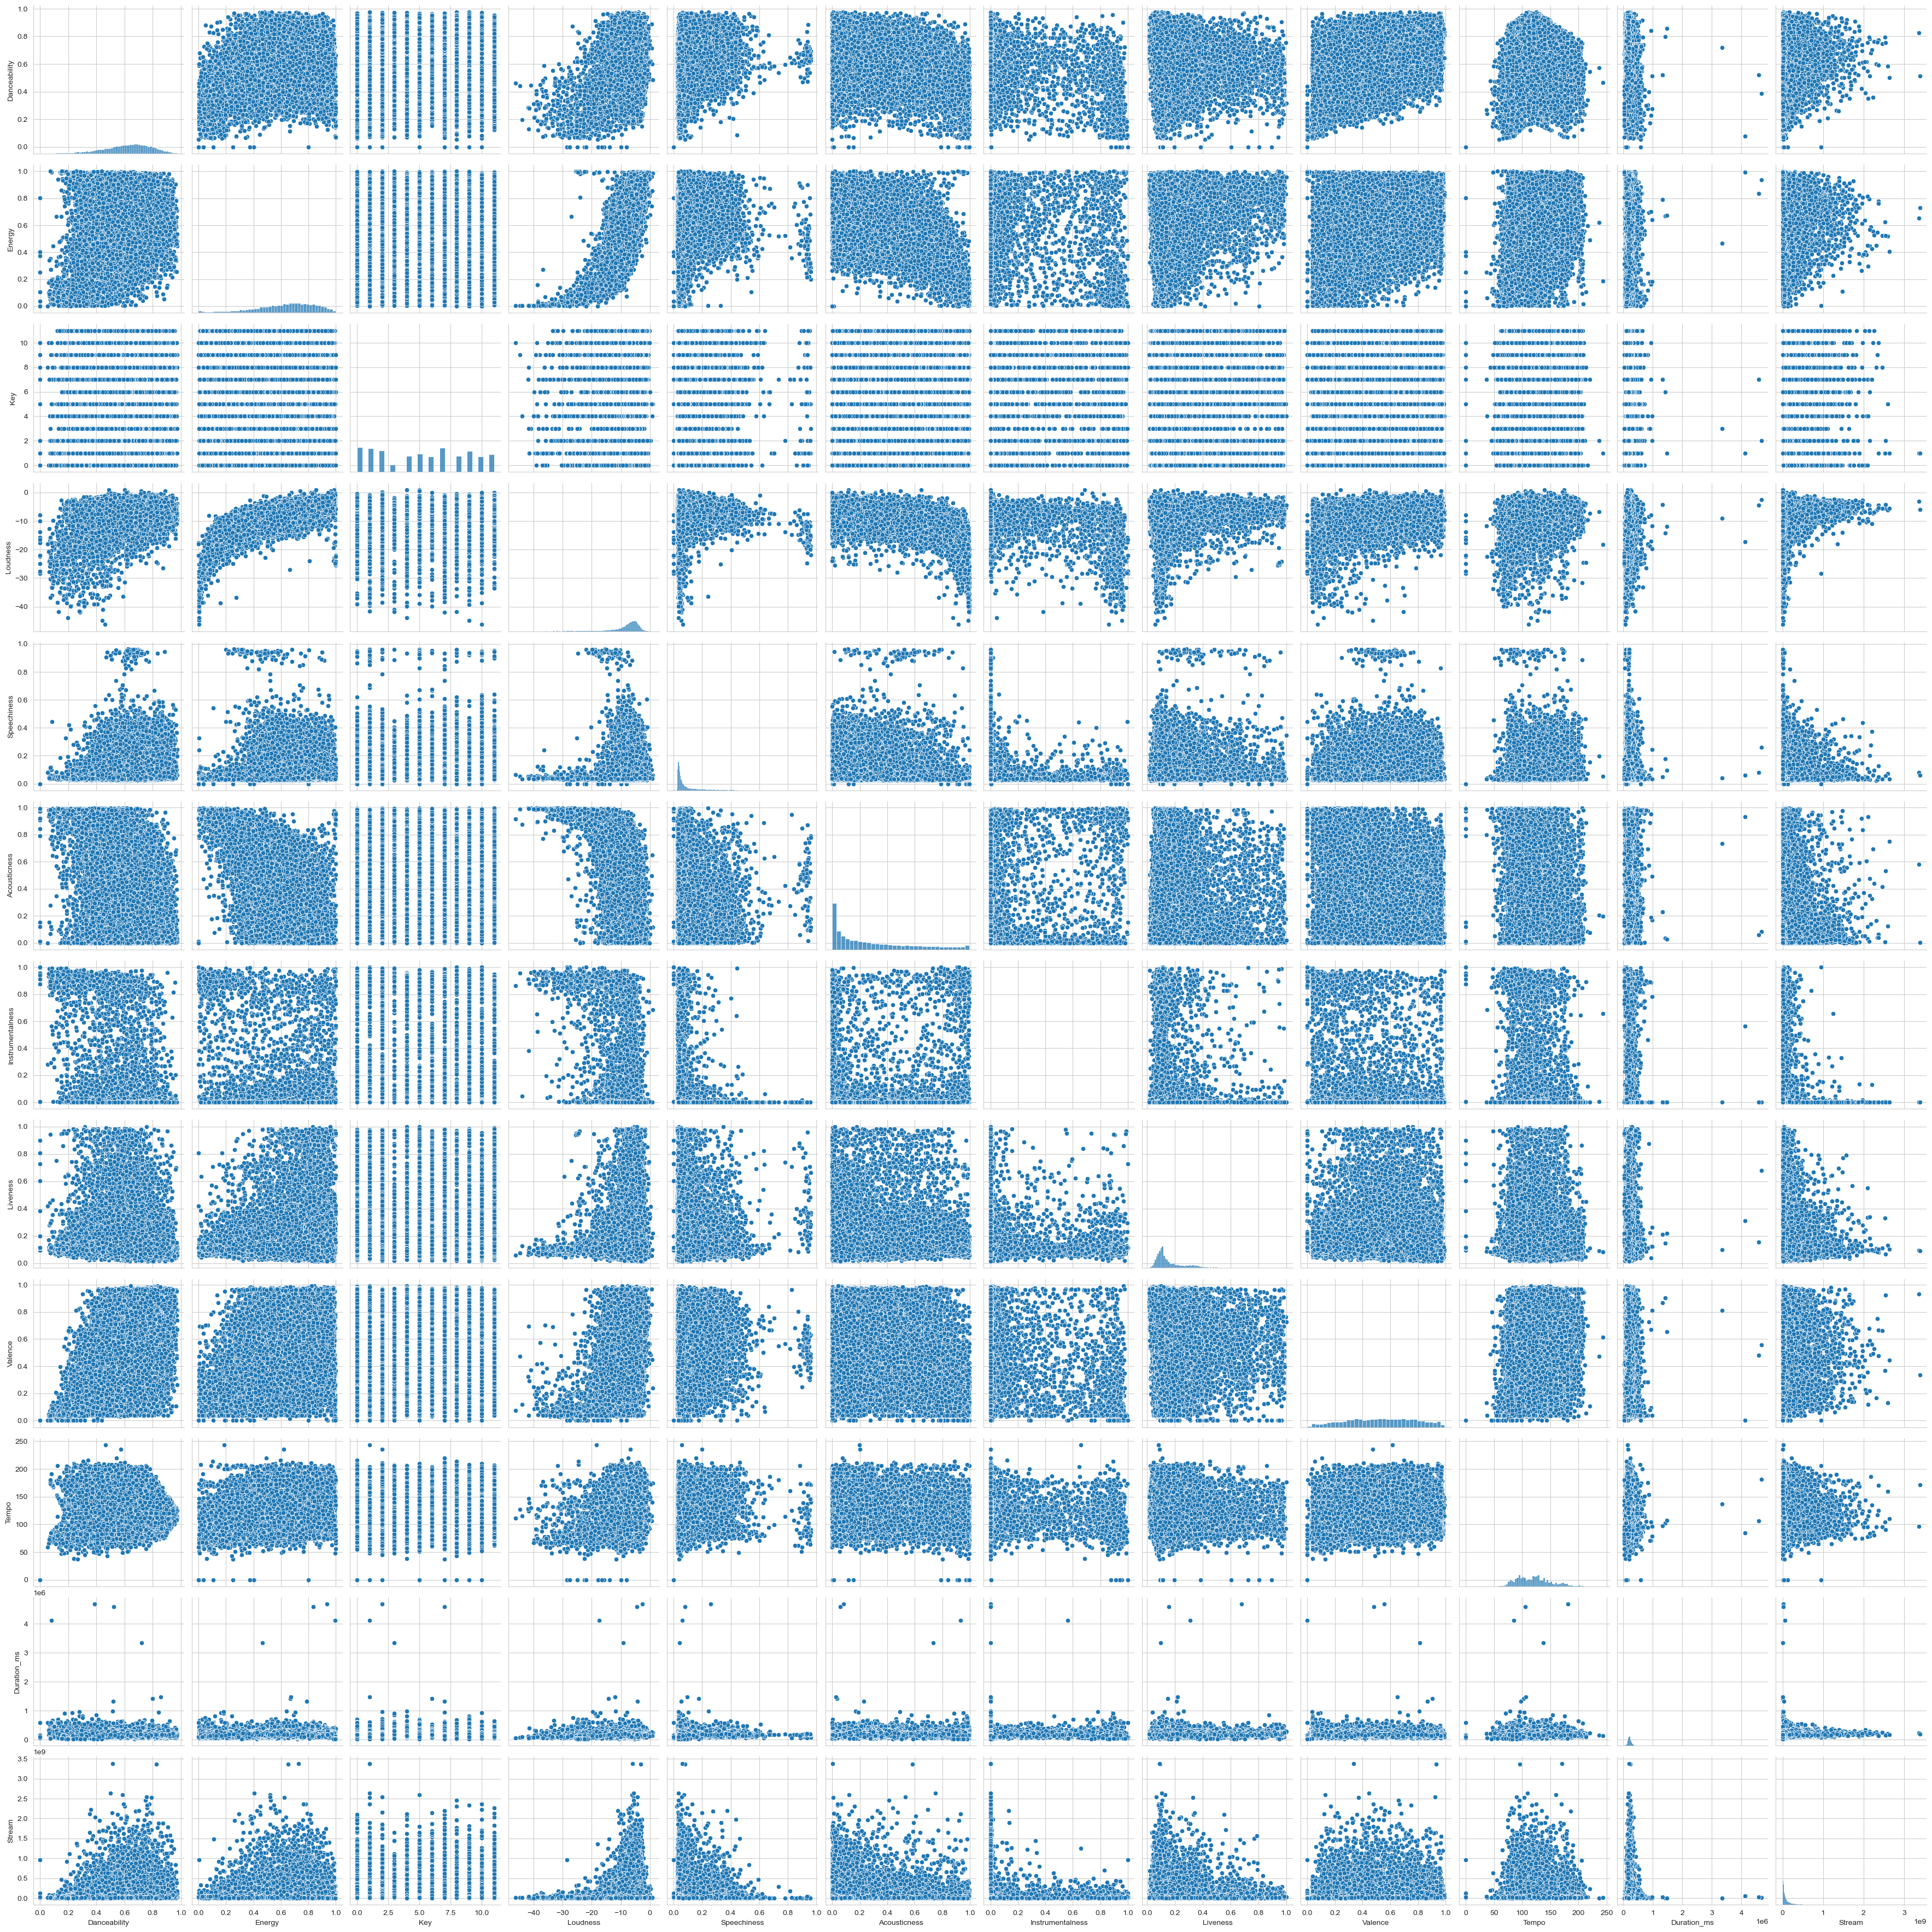

In [32]:
sns.set_style("whitegrid");
sns.pairplot(music, height=3);
# this takes a bit of a long time to finish rendering

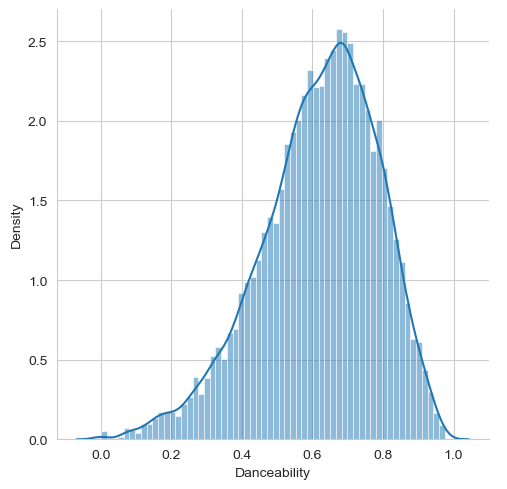

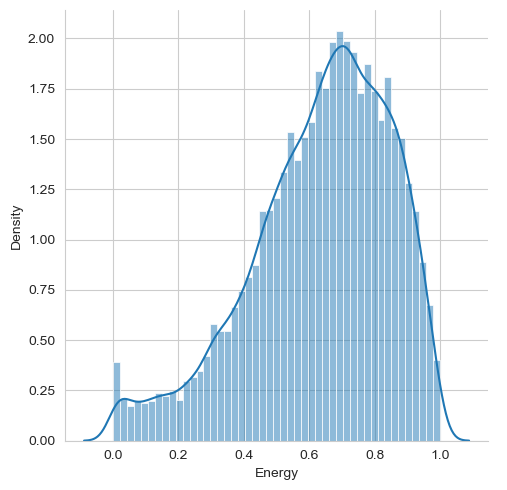

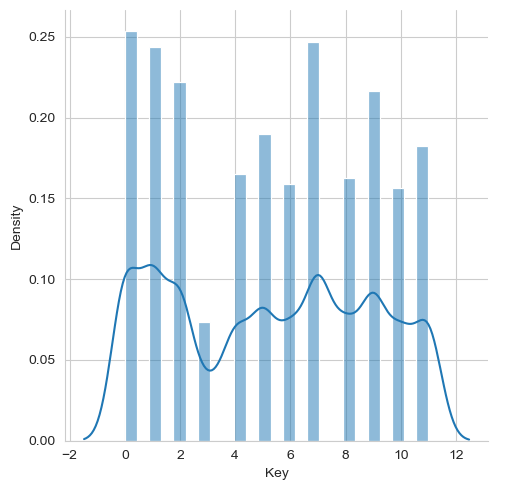

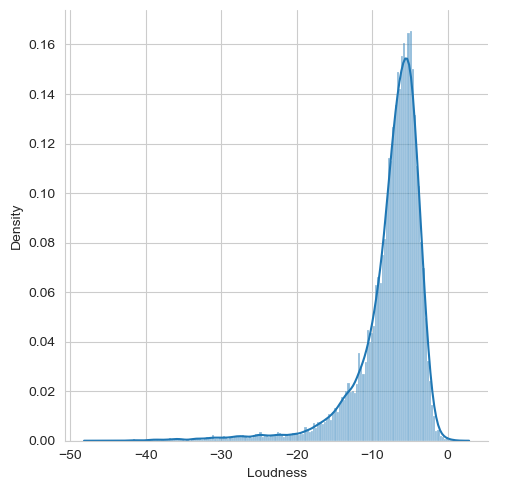

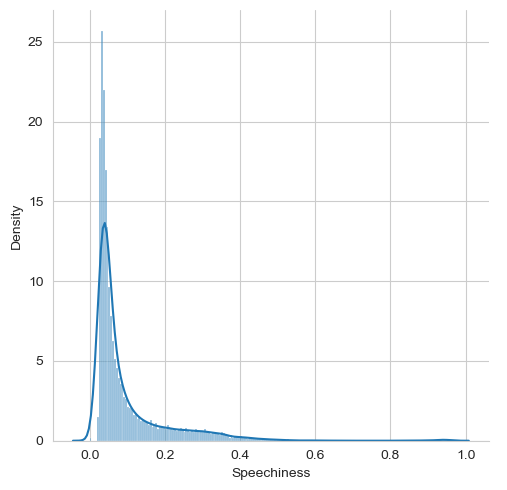

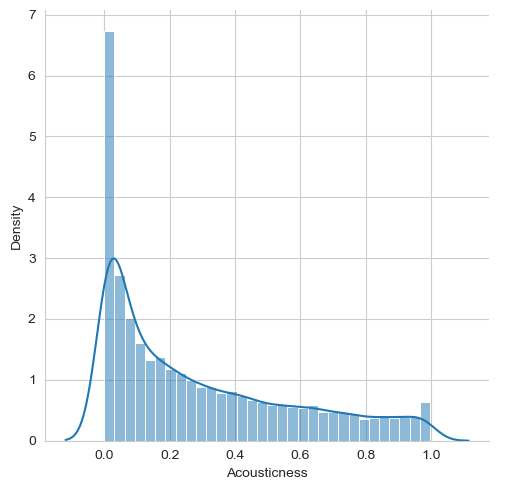

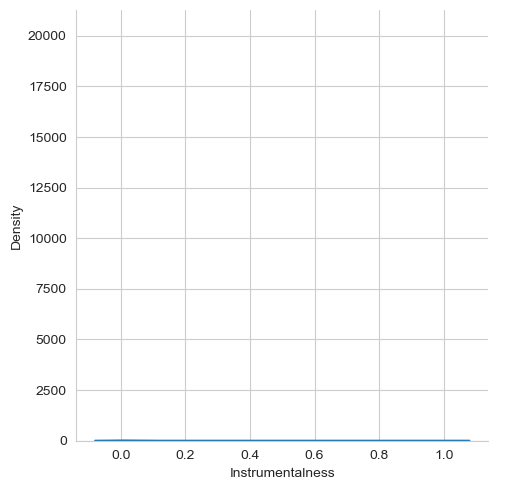

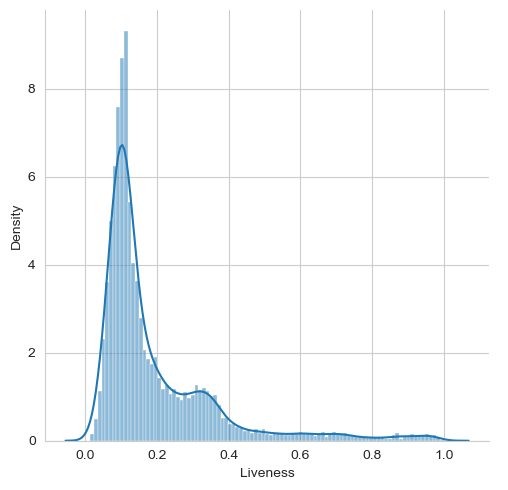

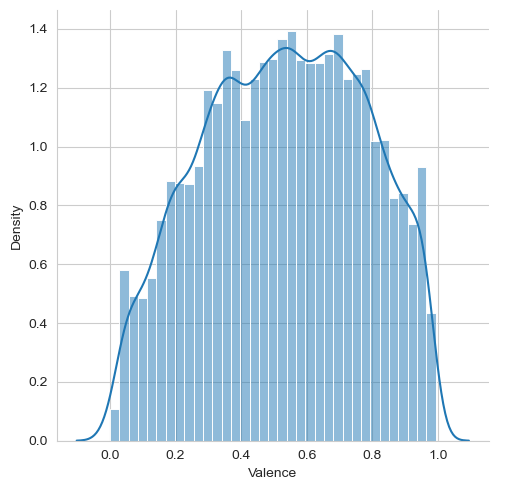

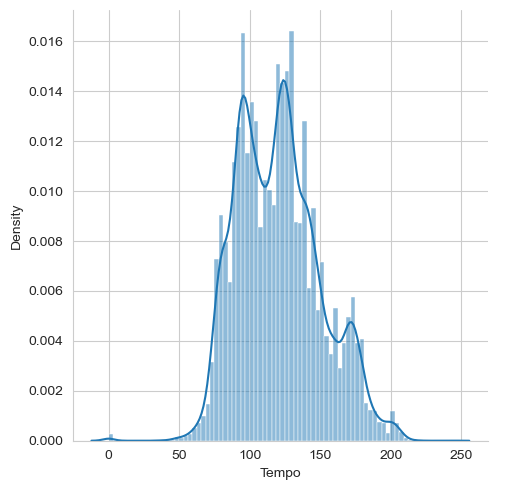

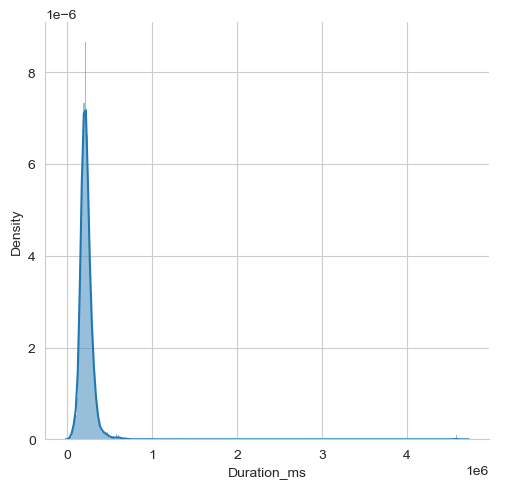

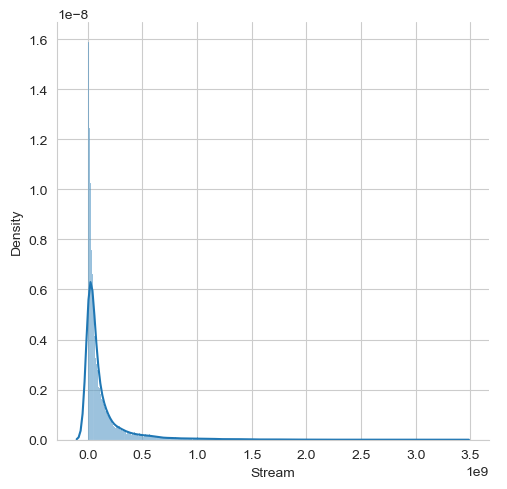

In [33]:
for feature in music.columns:
    sns.FacetGrid(music, height=5) \
        .map(sns.histplot, feature, kde=True, stat="density", kde_kws=dict(cut=3)) \
        .add_legend();

<Axes: >

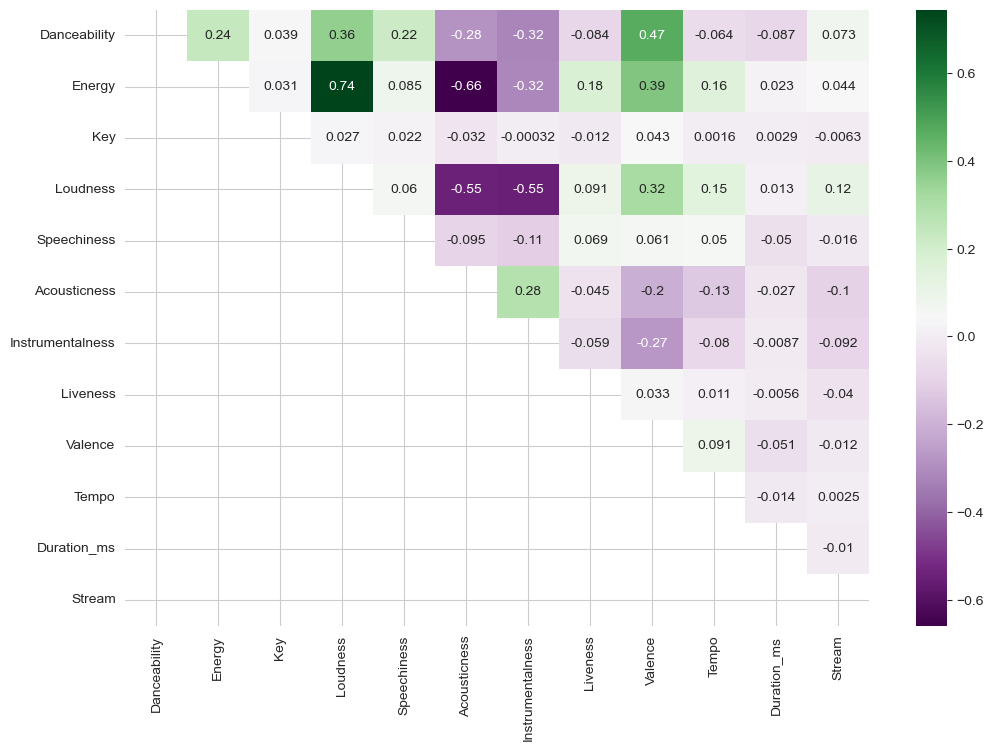

In [40]:
plt.figure(figsize = (12,8))
mask = np.tril(music.corr())
sns.heatmap(music.corr(), annot=True, cmap='PRGn', mask=mask, square=False)

In [6]:
print(max(music['Loudness'])) 
# they must be using a high reference pressure as the max is 0.92

0.92


## Analysis
These three variables don't seem to correlate very strongly with each other except for loudness and acousticness, which seem strongly inversely correlated. This makes sense because acoustic music tends to aim for a softer feel because it is not using electronic amplification. 

The graphs make it look like these three variables are more correlated than they are, but that is likely because the data itself is skewed. Loudness is reported in decibels (dB) which are on a log scale. Speechiness and acousticness look very skewed towards the low end of the scale, which makes sense according to my understanding of the music industry. 

Overall, I think it would make a lot of sense to transform this data because of how skewed it is.